# Predicting Forest Cover
## Mod 5 - Kaggle Competition - Machine Learning

By Valentina Fontiveros

### Import Libraries

In [1]:
import pandas as pd
import numpy as np

# plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns


### Exploratory Data Analysis

In [2]:
# read data
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [28]:
# descriptive statistics
train.describe()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
count,15120.00000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,...,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000
mean,7560.50000,2749.322553,156.676653,16.501587,227.195701,51.076521,1714.023214,212.704299,218.965608,135.091997,...,0.045635,0.040741,0.001455,0.006746,0.000661,0.002249,0.048148,0.043452,0.030357,4.000000
std,4364.91237,417.678187,110.085801,8.453927,210.075296,61.239406,1325.066358,30.561287,22.801966,45.895189,...,0.208699,0.197696,0.038118,0.081859,0.025710,0.047368,0.214086,0.203880,0.171574,2.000066
min,1.00000,1863.000000,0.000000,0.000000,0.000000,-146.000000,0.000000,0.000000,99.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,3780.75000,2376.000000,65.000000,10.000000,67.000000,5.000000,764.000000,196.000000,207.000000,106.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,7560.50000,2752.000000,126.000000,15.000000,180.000000,32.000000,1316.000000,220.000000,223.000000,138.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
75%,11340.25000,3104.000000,261.000000,22.000000,330.000000,79.000000,2270.000000,235.000000,235.000000,167.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000
max,15120.00000,3849.000000,360.000000,52.000000,1343.000000,554.000000,6890.000000,254.000000,254.000000,248.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000


In [ ]:
# training samples: 15120

In [ ]:
test.describe()

In [ ]:
# test samples 565892

In [ ]:
train.columns

In [ ]:
train.info()

In [ ]:
train.head()

### Data QC

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#train.hist(figsize=(20,20))
#plt.show()

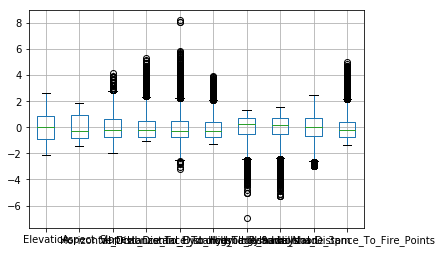

In [20]:
X_train[X_train.columns[0:10]].boxplot()

/Users/valentina/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/Users/valentina/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


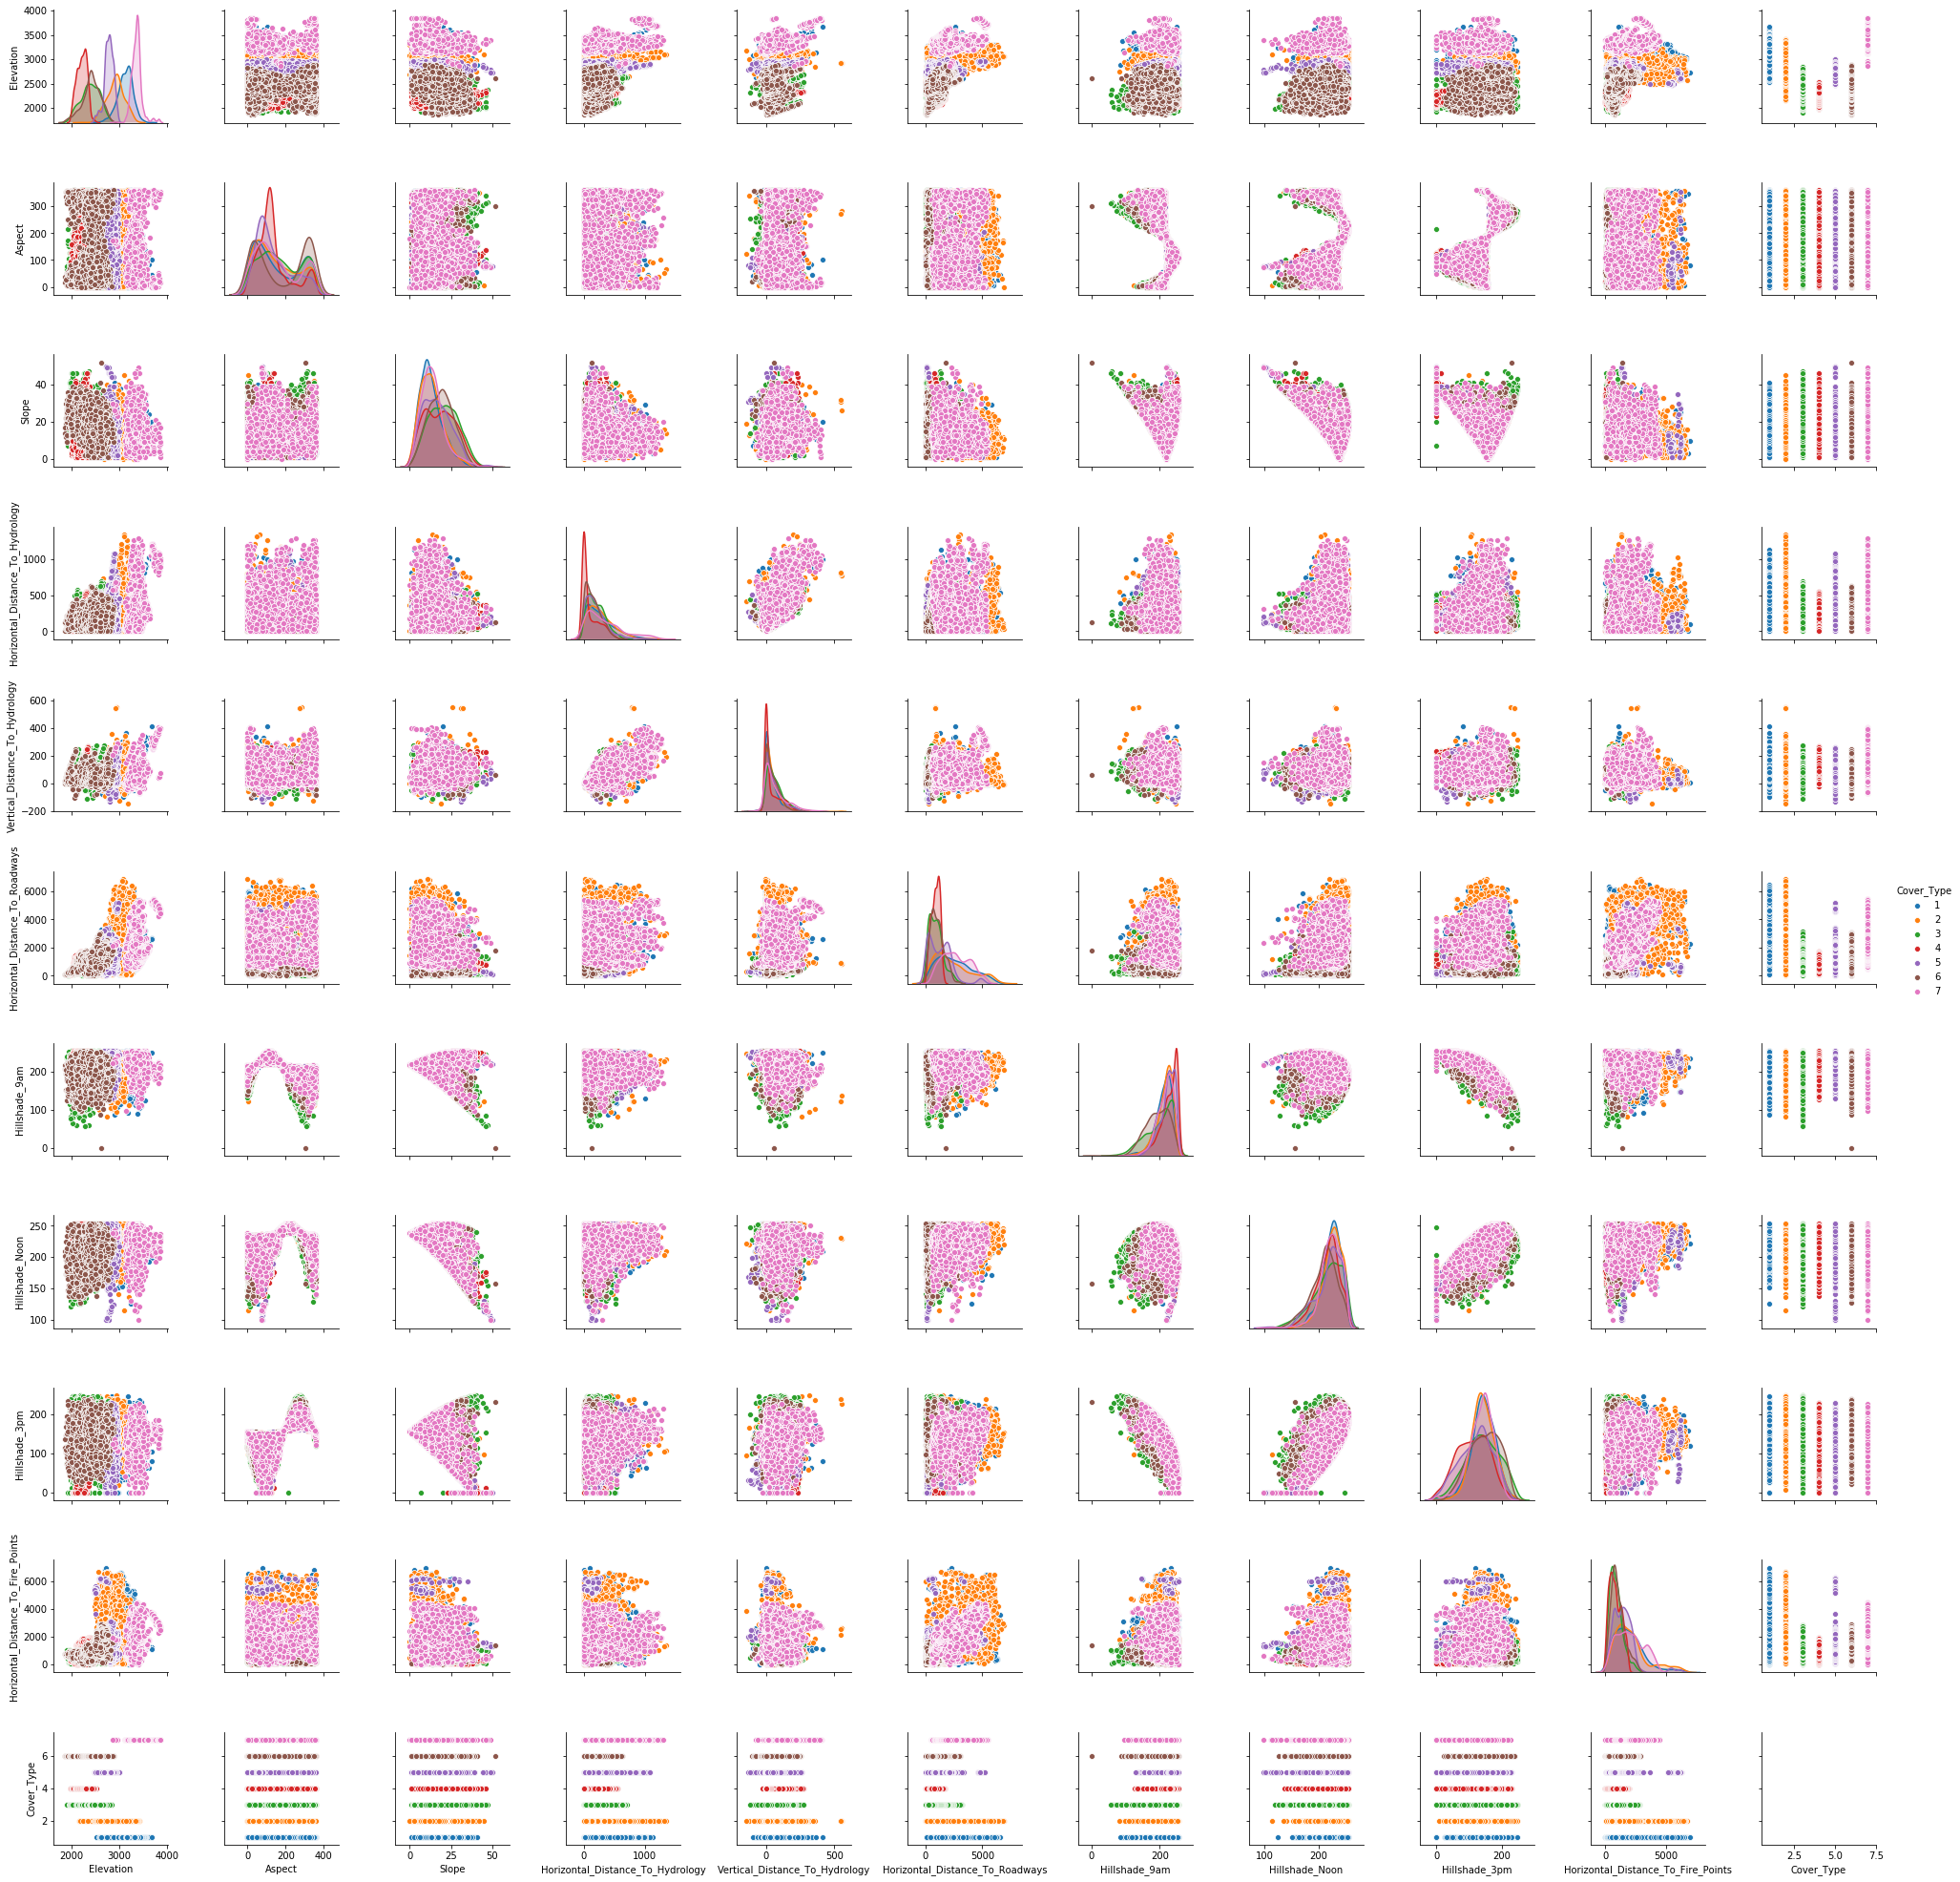

In [30]:
columns_t_analyze = list(X_train.columns[0:10])
columns_t_analyze.append("Cover_Type")
sns.pairplot(train[columns_t_analyze], hue="Cover_Type")
#plot.savefig("pairplot.png")

### Preprocessing Steps - Scaling

In [4]:
# Normalize
train.set_index('Id',inplace=True)  # Set Record Id As Index
features = train.columns[0:-1]      # create a list of features than don't include target/label



In [5]:
X = train[features]
y_train = train.Cover_Type # Series of Labels


from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()   

scaler.fit_transform(X)   # Scale data

X_train = pd.DataFrame(scaler.transform(X))
X_train.columns = X.columns

/Users/valentina/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/valentina/anaconda3/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/Users/valentina/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  # This is added back by InteractiveShellApp.init_path()


In [6]:
len(features)

54

In [7]:
# preview training dataset
X_train.head(10)

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
0,-0.367095,-0.959980,-1.597132,0.146639,-0.834074,-0.908681,0.271454,0.571653,0.281259,4.334805,...,-0.149835,-0.218671,-0.206085,-0.038173,-0.082413,-0.025726,-0.047474,-0.224908,-0.213134,-0.176939
1,-0.381461,-0.914559,-1.715424,-0.072337,-0.932054,-0.999246,0.238732,0.703225,0.346627,4.285710,...,-0.149835,-0.218671,-0.206085,-0.038173,-0.082413,-0.025726,-0.047474,-0.224908,-0.213134,-0.176939
2,0.130912,-0.160577,-0.887379,0.194243,0.227369,1.106379,0.696843,0.834797,-0.002005,4.191156,...,-0.149835,-0.218671,-0.206085,-0.038173,-0.082413,-0.025726,-0.047474,-0.224908,-0.213134,-0.176939
3,0.085421,-0.015231,0.177250,0.070474,1.092853,1.038455,0.827731,0.834797,-0.285268,4.272981,...,-0.149835,-0.218671,-0.206085,-0.038173,-0.082413,-0.025726,-0.047474,-0.224908,-0.213134,-0.176939
4,-0.369489,-1.014485,-1.715424,-0.353198,-0.850404,-0.998491,0.238732,0.659368,0.324838,4.237524,...,-0.149835,-0.218671,-0.206085,-0.038173,-0.082413,-0.025726,-0.047474,-0.224908,-0.213134,-0.176939
5,-0.407798,-0.224166,-1.242255,0.346574,-1.079023,-1.243015,0.565954,0.790940,0.106943,4.109330,...,-0.149835,-0.218671,-0.206085,-0.038173,-0.082413,-0.025726,-0.047474,-0.224908,-0.213134,-0.176939
6,-0.343152,-1.014485,-1.123963,0.203764,-0.752425,-0.815853,0.304176,0.264652,0.063364,4.313894,...,-0.149835,-0.218671,-0.206085,-0.038173,-0.082413,-0.025726,-0.047474,-0.224908,-0.213134,-0.176939
7,-0.345547,-0.978148,-1.478839,0.032391,-0.719765,-0.861135,0.304176,0.483939,0.194101,4.288437,...,-0.149835,-0.218671,-0.206085,-0.038173,-0.082413,-0.025726,-0.047474,-0.224908,-0.213134,-0.176939
8,-0.316816,-1.014485,-0.887379,0.060953,0.080400,-0.790947,0.336898,0.089223,-0.045584,4.302984,...,-0.149835,-0.218671,-0.206085,-0.038173,-0.082413,-0.025726,-0.047474,-0.224908,-0.213134,-0.176939
9,-0.328787,-0.887307,-0.769087,0.094276,-0.654445,-0.813589,0.500509,0.001508,-0.241689,4.290256,...,-0.149835,-0.218671,-0.206085,-0.038173,-0.082413,-0.025726,-0.047474,-0.224908,-0.213134,-0.176939


### K Nearest Neighbors

In [34]:
# Evaluation Metrics
from sklearn.metrics import r2_score 
from sklearn.metrics import mean_squared_error 

def performance(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    
    # TODO: Calculate the performance score between 'y_true' and 'y_predict'
    r2 = r2_score(y_true,y_predict)
    mse = mean_squared_error(y_true,y_predict)
    # Return the score
    return [r2, mse]



In [35]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

In [9]:
def find_best_k(X_train, y_train, min_k=1, max_k=25):
    from sklearn.metrics import accuracy_score
    best_k = 0
    best_score = 0.0
    for k in range(min_k, max_k+1, 2):
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)
        preds = knn.predict(X_train)
        f1 = accuracy_score(y_train, preds)
        if f1 > best_score:
            best_k = k
            best_score = f1
    
    print("Best Value for k: {}".format(best_k))
    print("Accuracy Score: {}".format(best_score))

In [10]:
find_best_k(X_train, y_train)

KeyboardInterrupt: 

In [36]:
kclf = KNeighborsClassifier(n_neighbors = 1)
kclf.fit(X_train,y_train)
y_train_pred = kclf.predict(X_train)
print(accuracy_score(y_train, y_train_pred))
print(performance(y_train,y_train_pred))

1.0
[1.0, 0.0]


### Decision Trees

In [13]:
from sklearn.tree import DecisionTreeClassifier
tclf= DecisionTreeClassifier(criterion='entropy')
tclf.fit(X_train,y_train) 
y_train_pred = tclf.predict(X_train)
print(accuracy_score(y_train, y_train_pred))

1.0


In [49]:
tclf


DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [33]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state=45)
regressor.fit(X_train, y_train)
y_train_pred = regressor.predict(X_train)
score = accuracy_score(y_train, y_train_pred)
score

1.0

In [39]:
regressor

DecisionTreeRegressor(criterion='mse', max_depth=30.0, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=45, splitter='best')

In [40]:
len(X_train.columns)

54

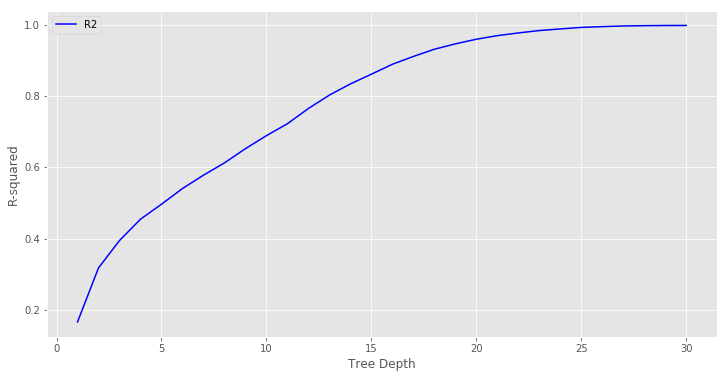

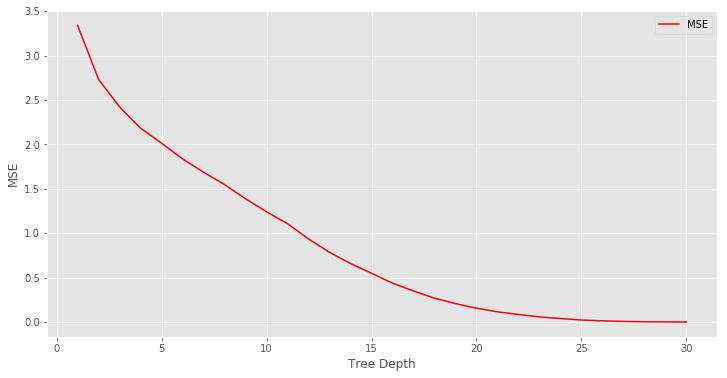

In [38]:

plt.style.use('ggplot')

# Identify the optimal tree depth for given data
max_depths = np.linspace(1, 30, 30, endpoint=True)
mse_results = []
r2_results = []

for max_depth in max_depths:
    regressor = DecisionTreeRegressor(max_depth=max_depth, random_state=45)
    regressor.fit(X_train, y_train)
    y_train_pred = regressor.predict(X_train)
    score = performance(y_train, y_train_pred)
    r2_results.append(score[0])
    mse_results.append(score[1])

plt.figure(figsize=(12,6))
plt.plot(max_depths, r2_results, 'b', label='R2')
plt.xlabel('Tree Depth')
plt.ylabel('R-squared')
plt.legend()
plt.show()
plt.figure(figsize=(12,6))
plt.plot(max_depths, mse_results, 'r', label='MSE')
plt.xlabel('Tree Depth')
plt.ylabel('MSE')
plt.legend()
plt.show()


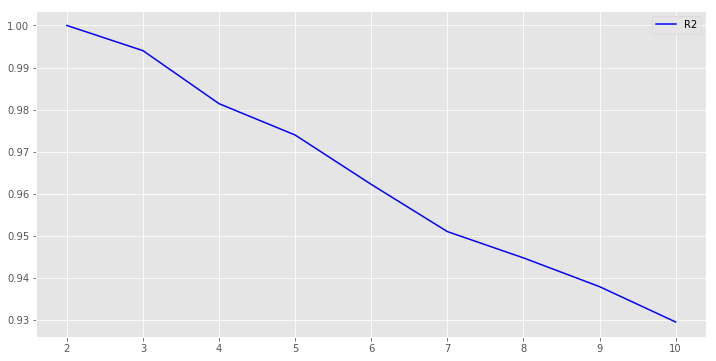

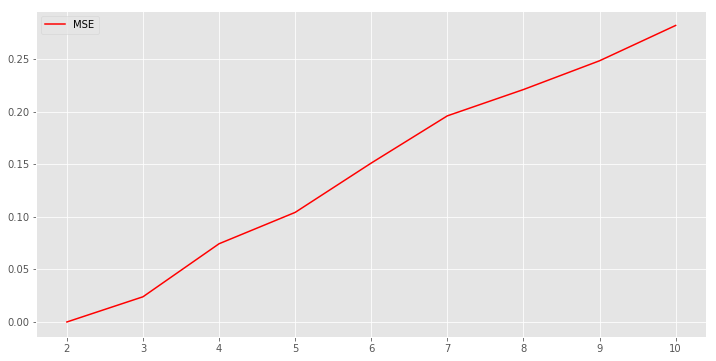

In [45]:
min_samples_splits = np.arange(2,11)
mse_results = []
r2_results = []

for min_samples_split in min_samples_splits:
    regressor = DecisionTreeRegressor(min_samples_split=int(min_samples_split), random_state=45)
    regressor.fit(X_train, y_train)
    y_train_pred = regressor.predict(X_train)
    score = performance(y_train, y_train_pred)
    r2_results.append(score[0])
    mse_results.append(score[1])

plt.figure(figsize=(12,6))
plt.plot(min_samples_splits, r2_results, 'b', label='R2')
plt.legend()
plt.show()
plt.figure(figsize=(12,6))
plt.plot(min_samples_splits, mse_results, 'r', label='MSE')
plt.legend()
plt.show()

### Support Vector Machines

In [ ]:
from sklearn import svm

vclf = svm.SVC(kernel='sigmoid')
vclf.fit(X_train, y_train)
y_train_pred = vclf.predict(X_train)
accuracy_score(y_train, y_train_pred)

### Ensemble Methods XGBoost

In [40]:
import xgboost as xgb


In [41]:
from sklearn.metrics import accuracy_score
clf = xgb.XGBClassifier()


In [42]:
clf.fit(X_train, y_train)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='multi:softprob', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1)

In [43]:
y_train_pred = clf.predict(X_train)
train_accuracy = accuracy_score(y_train,y_train_pred)
train_accuracy

0.7742063492063492

### Tuning Classifier

In [ ]:
list(range(100,500,50))

In [ ]:
param_grid = {
    "learning_rate": [0.1],
    'max_depth': [3],
    'min_child_weight': [10],
    'subsample': [1],
    'n_estimators': range(100,500,100)
}

In [ ]:
from sklearn.model_selection import GridSearchCV

grid_clf = GridSearchCV(clf, param_grid, scoring='accuracy', cv=None, n_jobs=1)
grid_clf.fit(X_train, y_train)

best_parameters = grid_clf.best_params_

print("Grid Search found the following optimal parameters: ")
for param_name in sorted(best_parameters.keys()):
    print("%s: %r" % (param_name, best_parameters[param_name]))

training_preds = grid_clf.predict(X_train)
#val_preds = grid_clf.predict(X_test)
training_accuracy = accuracy_score(y_train, y_train_pred)
#val_accuracy = accuracy_score(y_test, val_preds)

print("")
print("Training Accuracy: {:.4}%".format(training_accuracy * 100))
#print("Validation accuracy: {:.4}%".format(val_accuracy * 100))

### Submission Formatting

In [62]:
test.set_index('Id',inplace=True) 
scaler2 = scaler.fit(test)
X_test = pd.DataFrame(scaler2.transform(test))
X_test.columns = test.columns
y_test_pred = kclf.predict(X_test)


/Users/valentina/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/valentina/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until


In [66]:
data = [test.index, y_test_pred]
submission_df = pd.DataFrame(data={'Id':test.index,'Cover_Type':y_test_pred})
submission_df.head()

,Id,Cover_Type
0,15121,2
1,15122,1
2,15123,2
3,15124,2
4,15125,2


In [64]:
submission_df.Cover_Type.unique()

array([2, 1, 5, 7, 6, 4, 3])

In [67]:
submission_df.to_csv('second_pass.csv',index=False)

In [ ]:
submission = pd.read_csv('sample_submission.csv')

In [ ]:
# Format of submission ()
submission.head()